In [38]:
import mundi
from matplotlib import pyplot as plt

# Mundi demonstration

We will use the `mundi` library to investigate how countries distribute among income groups.This example is very limited since the core mundi package has only a few functionalities. We can use plugins to import more interesting information and to try to explore less obvious patterns.

In [39]:
countries = mundi.countries().mundi[..., "income_group", "region"]
countries

,name,type,code,numeric_code,long_code,country_code,parent_id,income_group,region
id,,,,,,,,,
AD,Andorra,country,AD,020,AND,<NA>,<NA>,high,europe
AE,United Arab Emirates,country,AE,784,ARE,<NA>,<NA>,high,middle-east
AF,Afghanistan,country,AF,004,AFG,<NA>,<NA>,low,south-asia
AG,Antigua and Barbuda,country,AG,028,ATG,<NA>,<NA>,high,latin-america
AI,Anguilla,country,AI,660,AIA,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...
YE,Yemen,country,YE,887,YEM,<NA>,<NA>,low,middle-east
YT,Mayotte,country,YT,175,MYT,<NA>,<NA>,NaN,NaN
ZA,South Africa,country,ZA,710,ZAF,<NA>,<NA>,upper-middle,sub-saharan-africa


We assign boolean columns to show if a country belong to each income group

In [40]:
countries["rich"] = countries["income_group"] == "high"
countries["medium"] = countries["income_group"] == "upper-middle"
countries["poor"] = countries["income_group"] == "lower-middle"
countries["very poor"] = countries["income_group"] == "low"

Now let us group by and see the prevalence of each category in each 

In [41]:
classes = countries[["rich", "medium", "poor", "very poor", "region"]].groupby("region").sum().astype(int)
classes

,rich,medium,poor,very poor
region,,,,
north-america,3,0,0,0
south-asia,0,2,4,2
sub-saharan-africa,1,6,16,23
europe,34,14,4,1
latin-america,17,20,3,1
middle-east,8,6,5,2
east-asia,13,10,13,1


Let us see this information as a nice bar chart. 

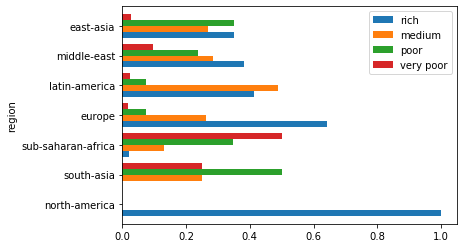

In [56]:
fractions = classes / classes.sum(1).values[:, None]
fractions.plot.barh(width=0.8)